<a href="https://colab.research.google.com/github/myjjojjojjo/Lesson/blob/main/%EC%97%B0%EC%8A%B5_1%ED%9A%8C%EA%B8%B0%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import time

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [120]:
df=pd.read_csv('student_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


<BarContainer object of 19 artists>

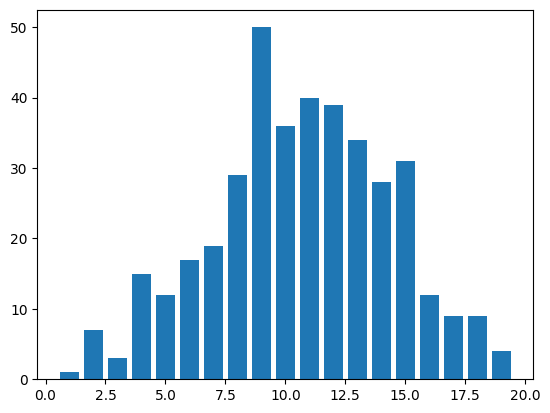

In [121]:
plt.bar(df.grade.value_counts().index,df.grade.value_counts().values)

In [122]:
stats.shapiro(df.grade)

ShapiroResult(statistic=0.9871252179145813, pvalue=0.0014302099589258432)

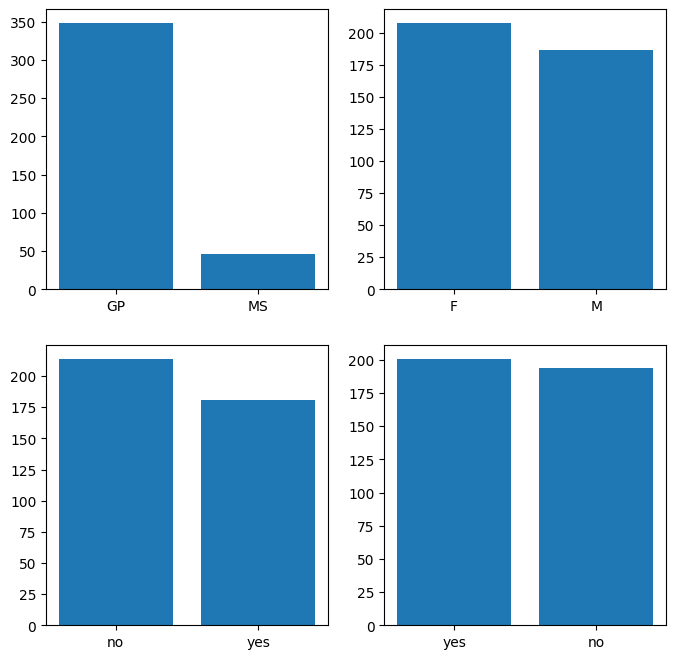

In [14]:
fig,axes=plt.subplots(2,2,figsize=(8,8))
axes[0][0].bar(df['school'].value_counts().index,df['school'].value_counts().values)
axes[0][1].bar(df['sex'].value_counts().index,df['sex'].value_counts().values)
axes[1][0].bar(df['paid'].value_counts().index,df['paid'].value_counts().values)
axes[1][1].bar(df['activities'].value_counts().index,df['activities'].value_counts().values)
plt.show()

<ipython-input-16-154042c8fb64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True)


<Axes: >

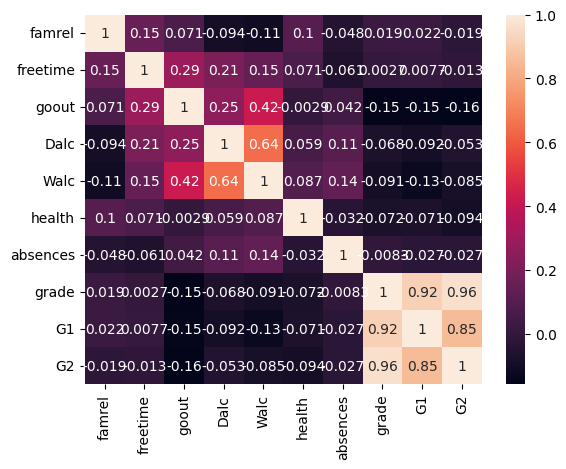

In [16]:
sns.heatmap(df.corr(method='pearson'),annot=True)

In [ ]:
# G1과 G2는 다중공선성이 크므로 선형회귀모델을 사용하는 경우 다중공선성 제거부터 해주어야 한다. (트리기반에서는 제거할 필요 없음.)
# 보통 0.7 이상의 값이 나타나면 주성분분석

In [123]:
df.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [124]:
dropped_df=df.drop(columns=['school','sex','paid','activities'])
dropped_df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


In [125]:
knn=KNNImputer()

In [126]:
knn.fit(dropped_df)
filled_df=knn.transform(dropped_df)
filled_df

array([[ 4.,  3.,  4., ...,  6.,  5.,  6.],
       [ 5.,  3.,  3., ...,  5.,  5.,  5.],
       [ 4.,  3.,  2., ...,  8.,  7.,  8.],
       ...,
       [ 5.,  5.,  3., ...,  8., 10.,  8.],
       [ 4.,  4.,  1., ..., 11., 11., 12.],
       [ 3.,  2.,  3., ...,  9.,  8.,  9.]])

In [127]:
df[dropped_df.columns]=filled_df

In [128]:
df[dropped_df.columns].isnull().sum()

famrel      0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
grade       0
G1          0
G2          0
dtype: int64

In [41]:
df.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [40]:
# dropped_df=filled_df하면
# dropped_df가 array가 되어버림. dropped_df라는 데이터에 데이터프레임 형태로 filled_df 데이터를 입힐 수가 없음.

In [134]:
melt_df=pd.melt(df,var_name='col',value_name='value')
melt_df

,col,value
0,school,GP
1,school,GP
2,school,GP
3,school,GP
4,school,GP
...,...,...
5525,G2,9.0
5526,G2,16.0
5527,G2,8.0
5528,G2,12.0


In [135]:
figsize=(18,6)
sns.boxplot(melt_df)

ValueError: ignored

In [131]:
df.absences

0       6.0
1       4.0
2      10.0
3       2.0
4       4.0
       ... 
390    11.0
391     3.0
392     3.0
393     0.0
394     5.0
Name: absences, Length: 395, dtype: float64

In [62]:
Q3=df['absences'].quantile(0.75)
Q1=df['absences'].quantile(0.25)
IQR=Q3-Q1
print(IQR)
outlier= df[ (df['absences'] <  Q1-1.5*IQR) |  (df['absences'] > Q3+1.5*IQR)]
outlier

8.0


,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
40,GP,F,no,yes,3.0,3.0,3.8,1.0,2.0,3.0,25.0,9.0,7.0,10.0
74,GP,F,yes,yes,4.0,3.0,3.0,2.0,4.0,5.0,54.0,11.0,11.0,12.0
103,GP,F,yes,no,4.0,3.0,5.0,1.0,1.0,2.0,26.0,6.0,7.0,6.0
183,GP,F,no,yes,5.0,3.0,3.0,2.0,3.0,1.0,56.0,9.0,9.0,9.0
198,GP,F,no,no,4.0,2.0,4.0,2.0,3.0,2.0,24.0,18.0,18.0,18.0
205,GP,F,yes,no,4.0,4.0,3.0,3.0,4.0,5.0,28.0,9.0,10.0,9.0
216,GP,F,yes,no,3.0,4.0,5.0,2.0,4.0,1.0,22.0,5.0,6.0,6.0
260,GP,F,yes,no,3.0,1.0,2.0,1.0,3.0,2.0,21.0,18.0,17.0,18.0
276,GP,F,no,no,4.0,1.0,1.0,1.0,1.0,5.0,75.0,9.0,10.0,9.0
277,GP,M,yes,yes,3.0,2.0,4.0,1.0,4.0,3.0,22.0,9.0,9.0,9.0


In [63]:
outlier_index= df[ (df['absences'] <  Q1-1.5*IQR) |  (df['absences'] > Q3+1.5*IQR)].index
outlier_index

Int64Index([40, 74, 103, 183, 198, 205, 216, 260, 276, 277, 280, 307, 313, 315,
            320],
           dtype='int64')

In [73]:
round(df.absences.mean(),1)

4.6

In [75]:
df.loc[outlier_index,'absences']=df.absences.mean()
df.loc[outlier_index,'absences']

40     4.577955
74     4.577955
103    4.577955
183    4.577955
198    4.577955
205    4.577955
216    4.577955
260    4.577955
276    4.577955
277    4.577955
280    4.577955
307    4.577955
313    4.577955
315    4.577955
320    4.577955
Name: absences, dtype: float64

In [76]:
G2_Q3=df['G2'].quantile(0.75)
G2_Q1=df['G2'].quantile(0.25)
G2_IQR=G2_Q3-G2_Q1
print(G2_IQR)
G2_outlier= df[ (df['G2'] <  Q1-1.5*G2_IQR) |  (df['G2'] > Q3+1.5*G2_IQR)]
G2_outlier

5.0


,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
8,GP,M,yes,no,4.0,2.0,2.0,1.0,1.0,1.0,0.0,18.0,16.0,18.0
14,GP,M,no,no,4.4,5.0,2.0,1.0,1.0,3.0,0.0,15.0,14.0,16.0
27,GP,M,yes,no,2.0,2.0,4.0,2.0,4.0,1.0,4.0,15.0,15.0,16.0
31,GP,M,no,yes,4.0,3.0,1.0,1.0,1.0,5.0,0.0,17.0,17.0,16.0
32,GP,M,no,yes,4.0,5.0,2.0,1.0,1.0,5.0,0.0,16.0,17.0,16.0
36,GP,M,no,yes,5.0,4.0,3.0,1.0,1.0,4.0,2.0,16.0,15.0,16.0
37,GP,M,no,yes,2.0,4.0,3.0,1.0,1.0,5.0,7.0,15.0,15.0,16.0
42,GP,M,no,yes,4.0,3.0,3.0,1.0,1.0,5.0,2.0,18.0,19.0,18.0
47,GP,M,no,yes,4.0,2.0,2.0,1.0,1.0,2.0,4.0,19.0,19.0,19.0
59,GP,F,no,no,4.0,2.0,3.0,1.0,1.0,5.0,2.0,16.0,15.0,16.0


In [77]:
G2_outlier_index= df[ (df['G2'] <  Q1-1.5*G2_IQR) |  (df['G2'] > Q3+1.5*G2_IQR)].index
G2_outlier_index

Int64Index([  8,  14,  27,  31,  32,  36,  37,  42,  47,  59,  69,  91, 101,
            104, 107, 110, 113, 129, 139, 182, 200, 222, 245, 265, 286, 293,
            303, 306, 359, 374, 391],
           dtype='int64')

In [79]:
df.loc[G2_outlier_index,'G2']=df['G2'].mean()
df.loc[G2_outlier_index,'G2']

8      10.017161
14     10.017161
27     10.017161
31     10.017161
32     10.017161
36     10.017161
37     10.017161
42     10.017161
47     10.017161
59     10.017161
69     10.017161
91     10.017161
101    10.017161
104    10.017161
107    10.017161
110    10.017161
113    10.017161
129    10.017161
139    10.017161
182    10.017161
200    10.017161
222    10.017161
245    10.017161
265    10.017161
286    10.017161
293    10.017161
303    10.017161
306    10.017161
359    10.017161
374    10.017161
391    10.017161
Name: G2, dtype: float64

In [85]:
def outlier(col):
  Q3=df[col].quantile(0.75)
  Q1=df[col].quantile(0.25)
  IQR=Q3-Q1
  print(IQR)
  # outlier.index= df[ (df[col] <  Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR) ].index
  # df.loc[outlier_index,col]=df[col].mean()
  # df.loc[outlier_index,col]

# 함수 만들 수 있으면 좋을텐데

In [112]:
df=pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_GP       395 non-null    uint8  
 11  school_MS       395 non-null    uint8  
 12  sex_F           395 non-null    uint8  
 13  sex_M           395 non-null    uint8  
 14  paid_no         395 non-null    uint8  
 15  paid_yes        395 non-null    uint8  
 16  activities_no   395 non-null    uint8  
 17  activities_yes  395 non-null    uin

In [113]:
x=df.drop(columns='grade')
y=df['grade']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2022)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 17)
(119, 17)
(276,)
(119,)


In [115]:
def model_result(model):

    start=time.time()
    model.fit(x_train,y_train)
    end=time.time()

    pred=model.predict(x_test)
    accuracy=r2_score(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))

    print(f'{end-start:.5f}sec')
    print('정확도:',accuracy)
    print('RMSE',rmse)

In [107]:
rf=RandomForestRegressor()
svr=SVR()
lr=LinearRegression()
log=LogisticRegression()
xg=XGBClassifier()

In [116]:
model_result(log)

ValueError: ignored

In [117]:
model_result(xg)

ValueError: ignored

In [118]:
model_result(rf)

0.18483sec
정확도: 0.9604080994232087
RMSE 0.7641507471767521


In [119]:
model_result(lr)

0.00614sec
정확도: 0.8931043520755987
RMSE 1.255613218201133
